<a href="https://colab.research.google.com/github/Arifulhaque-02128/ML_Projects/blob/main/medical_specialist_classification_using_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [11]:
df = pd.read_csv("/content/gdrive/MyDrive/NLP/Project/Bengali_medical_specialist_classificattion/Specialist Classification.csv")


In [12]:
df.head()

,Patient ID,Gender,Problem,Specialist
0,NaN,NaN,NaN,NaN
1,1.0,মহিলা,আমার তিন দিন যাবত অনেক মাথা ব্যথা,Medicine
2,2.0,পুরুষ,আমার প্রায় এক সপ্তাহ ধরে রোদে গেলেই মাথা ধরে য...,Medicine
3,3.0,মহিলা,আমার বোনের কয়েকদিন ধরে চোখ আর মাথা ব্যথা,Medicine
4,4.0,মহিলা,আমার মায়ের কপালের দুই দিকে অনেক ব্যথা করে আর ন...,Medicine


In [13]:
df.isnull().sum()

Patient ID    1
Gender        1
Problem       1
Specialist    1
dtype: int64

In [14]:
new_df = df.dropna()

In [15]:
new_df.isnull().sum()

Patient ID    0
Gender        0
Problem       0
Specialist    0
dtype: int64

In [16]:
new_df.head()

,Patient ID,Gender,Problem,Specialist
1,1.0,মহিলা,আমার তিন দিন যাবত অনেক মাথা ব্যথা,Medicine
2,2.0,পুরুষ,আমার প্রায় এক সপ্তাহ ধরে রোদে গেলেই মাথা ধরে য...,Medicine
3,3.0,মহিলা,আমার বোনের কয়েকদিন ধরে চোখ আর মাথা ব্যথা,Medicine
4,4.0,মহিলা,আমার মায়ের কপালের দুই দিকে অনেক ব্যথা করে আর ন...,Medicine
5,5.0,পুরুষ,আমার অনেক মাথা ব্যথা করে,Medicine


In [17]:
new_df["Specialist"].value_counts()

Specialist
Medicine           278
Ophthalmologist     71
Gynecologist        59
Surgery             58
Orthopedic          48
Cardiologist        42
Skin                38
Dentist             37
ENT                 27
Name: count, dtype: int64

In [18]:
new_df["Gender"].value_counts()

Gender
মহিলা    370
পুরুষ    288
Name: count, dtype: int64

In [19]:
sns.set(style="ticks", context="talk", font_scale=1.5)
plt.style.use("dark_background")

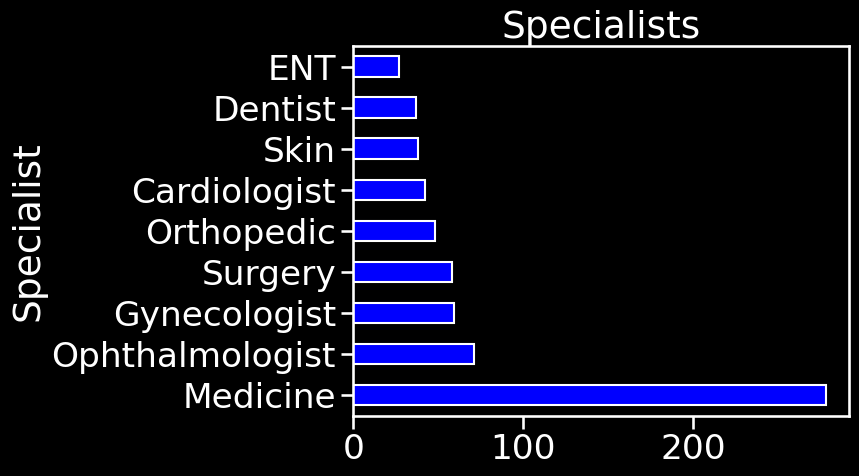

In [20]:
new_df["Specialist"].value_counts().plot.barh(color='blue', title='Specialists',);

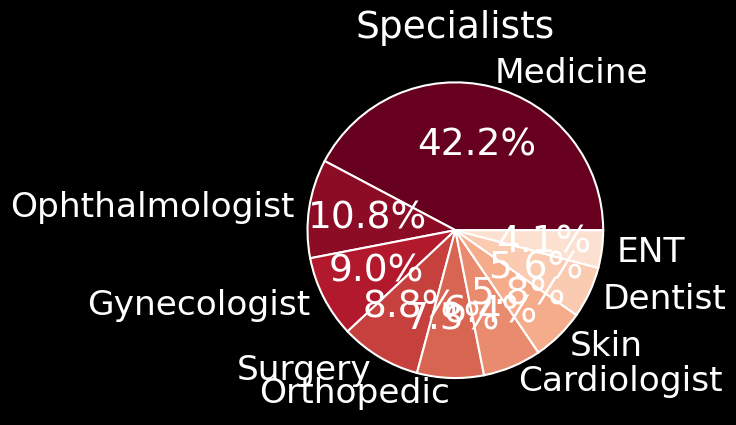

In [21]:
color = plt.cm.RdBu(np.linspace(0,1,20))
new_df["Specialist"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="Gender",colors=color,autopct="%0.1f%%")
plt.title("Specialists")
plt.axis("off")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Bengali natively.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2489 (\N{BENGALI LETTER HA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  func(*args, **kwargs)
/us

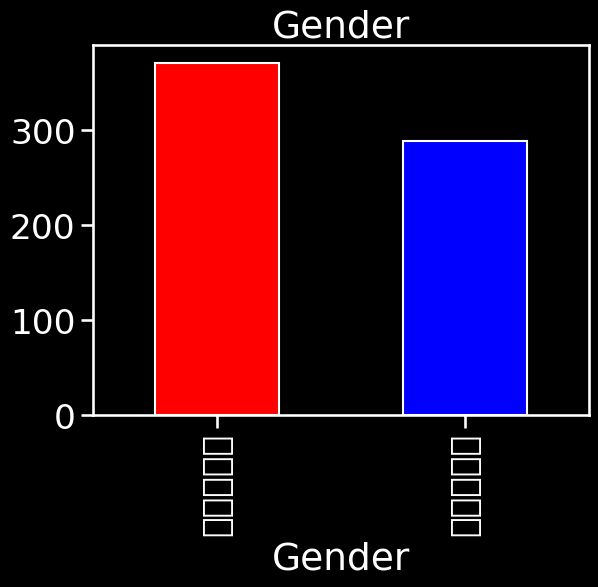

In [23]:
new_df["Gender"].value_counts().nlargest(4).plot.bar(color=['red','blue'], title='Gender');

In [24]:
den = new_df[(new_df['Specialist']=='Dentist')].reset_index(drop=True)
den.head()

,Patient ID,Gender,Problem,Specialist
0,20.0,পুরুষ,আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে ...,Dentist
1,21.0,পুরুষ,আমার দাঁত ভেঙ্গে যাচ্ছে,Dentist
2,22.0,মহিলা,আমার মাড়ি অনেক ব্যথা আর ব্রাশ করার সময় রক্ত পর...,Dentist
3,23.0,মহিলা,আমার দাঁতে কালো দাগ হচ্ছে কোনোভাবেই দাগ যাচ্ছে...,Dentist
4,24.0,পুরুষ,আমি দাঁতে জোর পাচ্ছি না।,Dentist


In [25]:
den["Gender"].value_counts()

Gender
পুরুষ    21
মহিলা    16
Name: count, dtype: int64

In [26]:
surg = new_df[(new_df['Specialist']=='Surgery')].reset_index(drop=True)
surg.head()

,Patient ID,Gender,Problem,Specialist
0,11.0,মহিলা,আমার মুখে অনেক বড় ফোঁড়ার মত উঠে আর লাল হয়ে থাক...,Surgery
1,96.0,মহিলা,আমার স্তনে প্রচন্ড ব্যথা করে। প্রায় এক মাস ধরে...,Surgery
2,97.0,মহিলা,আমার নিপল অনেক চুল্কায় এবং সাদা ময়লার মত বের হয়।,Surgery
3,98.0,মহিলা,নিপল অনেক ব্যথা করে আর ফুলে গিয়েছে আর চাপ দিলে...,Surgery
4,99.0,মহিলা,আমার নিপলে লাল গোটার মত বের হয়েছে এবং লাল হয়ে ...,Surgery


In [27]:
surg["Gender"].value_counts()

Gender
মহিলা    44
পুরুষ    14
Name: count, dtype: int64

In [28]:
ski = new_df[(new_df['Specialist']=='Skin')].reset_index(drop=True)
ski.head()

,Patient ID,Gender,Problem,Specialist
0,9.0,পুরুষ,আমার কপালে গোটার মত বের হয়েছে,Skin
1,10.0,পুরুষ,আমার অনেক ব্রণ হয় মুখে। আর অনেক ব্যথা করে।,Skin
2,12.0,পুরুষ,আমার মুখে গোটা উঠে মুখে কালো দাগ পরে যাচ্ছে।,Skin
3,13.0,মহিলা,আমার নাকে আর থুতনিতে সাদা বিচির মত উঠে আর মুখ ...,Skin
4,55.0,মহিলা,আমি ধুলায় গেলে আমার স্কিন অনেক চুল্কায় আর ফুলে...,Skin


In [29]:
ski["Gender"].value_counts()

Gender
মহিলা    23
পুরুষ    15
Name: count, dtype: int64

In [30]:
import re,nltk,json

### Cleaning Data

In [31]:
# Cleaning Data [Remove unncessary symbols]
def cleaning_data(problem):
      problems = re.sub('[^\u0980-\u09FF]',' ',str(problem)) #removing unnecessary punctuation
      return problems
# Apply the function into the dataframe
new_df['cleaned_problem'] = new_df['Problem'].apply(cleaning_data)

# print some cleaned reviews from the dataset
sample_data = [20,50,100,200,300,350,400,450,500,600]
for i in sample_data:
  print('Original: ', new_df.Problem[i],'\nCleaned:',
           new_df.cleaned_problem[i],'\n','Category:-- ', new_df.Specialist[i],'\n')

Original:  আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে পারি না। অনেক অস্বস্তি লাগে। 
Cleaned: আমার দাঁত শিরশির করে  ঠান্ডা বা গরম কিছু খেতে পারি না  অনেক অস্বস্তি লাগে  
 Category:--  Dentist 

Original:  আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে। 
Cleaned: আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে  
 Category:--  Ophthalmologist 

Original:  আমার স্তনের নিপল দিয়ে দুধের মত সাদা রস বের হতে থাকে কিন্তু আমি প্রেগন্যান্ট না। 
Cleaned: আমার স্তনের নিপল দিয়ে দুধের মত সাদা রস বের হতে থাকে কিন্তু আমি প্রেগন্যান্ট না  
 Category:--  Surgery 

Original:  আমার পায়ে পানি আসছে। ঠিকমত হাঁটতে পারছি না 
Cleaned: আমার পায়ে পানি আসছে  ঠিকমত হাঁটতে পারছি না 
 Category:--  Medicine 

Original:  আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে। 
Cleaned: আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে  
 Category:--  Ophthalmologist 

Original:  আমার ছেলের রাতের বেলা জ্

<ipython-input-31-1d672da7779e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_problem'] = new_df['Problem'].apply(cleaning_data)


### Dataset Analysis

In [32]:
def data_summary(dataset):

    """
    This function will print the summary of the problems and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(new_df.cleaned_problem) for word in t.strip().split()]
    class_label= [k for k,v in new_df.Specialist.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(new_df[new_df.Specialist==label].cleaned_problem) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(new_df[new_df.Specialist==label].cleaned_problem)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(new_df[new_df.Specialist==label].cleaned_problem))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(new_df)


Class Name :  Medicine
Number of Documents:278
Number of Words:3032
Number of Unique Words:521
Most Frequent Words:

আমার	252
অনেক	195
আর	128
করে	104
ব্যথা	98
না	75
হয়	73
লাগে	45
মাথা	39
হয়ে	37

Class Name :  Ophthalmologist
Number of Documents:71
Number of Words:778
Number of Unique Words:177
Most Frequent Words:

আমার	51
চোখ	36
অনেক	29
আর	28
করে	24
দেখতে	21
আমি	20
না	20
ব্যথা	19
হয়ে	17

Class Name :  Gynecologist
Number of Documents:59
Number of Words:771
Number of Unique Words:199
Most Frequent Words:

আমার	58
হয়	49
অনেক	45
আর	36
ব্যথা	25
করে	22
পিরিয়ড	21
মত	19
বের	19
না	16

Class Name :  Surgery
Number of Documents:58
Number of Words:699
Number of Unique Words:136
Most Frequent Words:

আমার	58
আর	42
মত	33
অনেক	30
ব্যথা	27
আছে	26
হয়ে	21
করে	21
লাল	17
বের	16

Class Name :  Orthopedic
Number of Documents:48
Number of Words:522
Number of Unique Words:148
Most Frequent Words:

ব্যথা	42
আমার	41
করে	36
না	25
অনেক	23
হাত	10
পায়ের	9
আমি	9
মাজা	9
পারছে	9

Class Name :  Cardiologist
Number o

### Problem Visualization

<ipython-input-33-59675607e0ba>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(class_names, rotation=45);


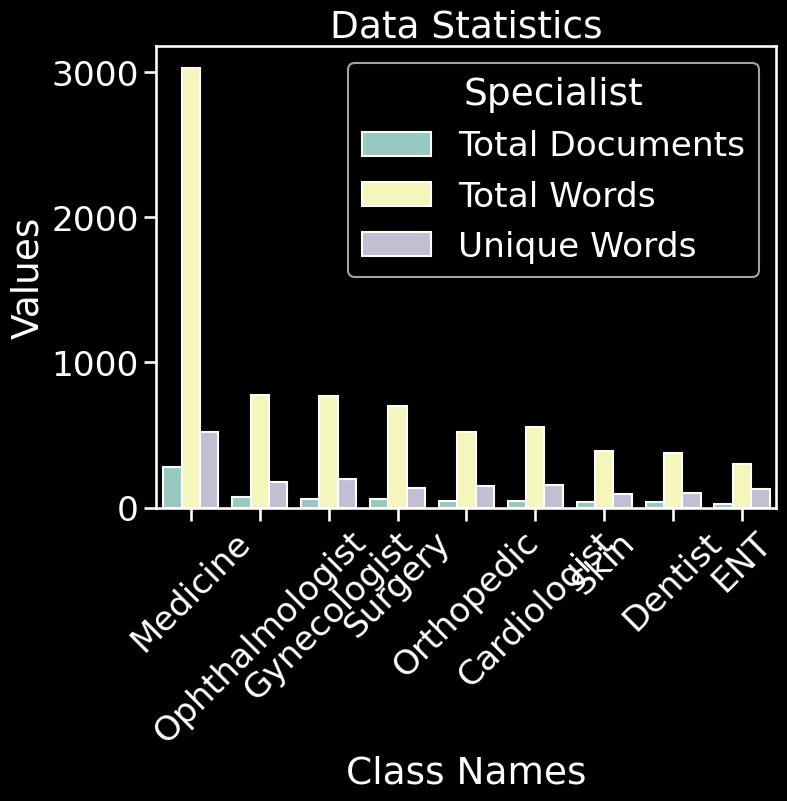

In [33]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Specialist", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Specialist')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

### Problem Text Length Visualization

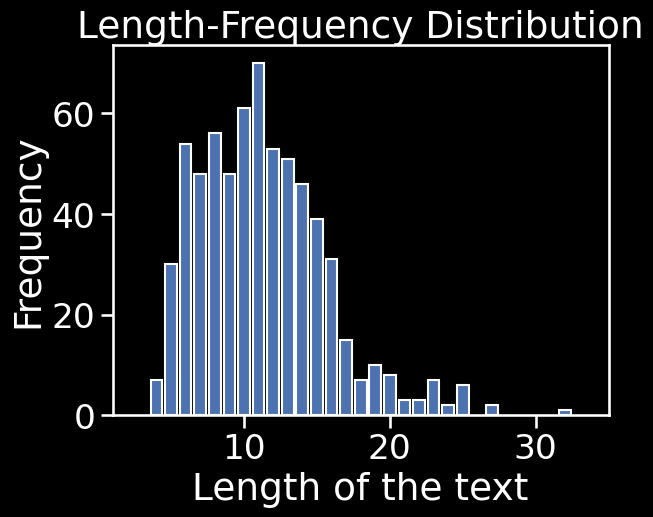

Maximum Length of a text: 32
Minimum Length of a text: 4
Average Length of a text: 11.0


In [34]:
# Calculate the Review of each of the Review
new_df['textLength'] = new_df.cleaned_problem.apply(lambda x:len(x.split()))
frequency = dict()
for i in new_df.textLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 35)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the text')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a text: {max(new_df.textLength)}")
print(f"Minimum Length of a text: {min(new_df.textLength)}")
print(f"Average Length of a text: {round(np.mean(new_df.textLength),0)}")

In [35]:
# segregating dataframe for analyzing individual problem
df_med = new_df[new_df['Specialist'] == 'Medicine']
df_ophtha = new_df[new_df['Specialist'] == 'Ophthalmologist']
df_gyne = new_df[new_df['Specialist'] == 'Gynecologist']
df_surg = new_df[new_df['Specialist'] == 'Surgery']

df_ortho = new_df[new_df['Specialist'] == 'Orthopedic']
df_cardio = new_df[new_df['Specialist'] == 'Cardiologist']
df_skin = new_df[new_df['Specialist'] == 'Skin']
df_dent = new_df[new_df['Specialist'] == 'Dentist']
df_ent = new_df[new_df['Specialist'] == 'ENT']


In [36]:
!pip install wordcloud
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 27.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.6 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=69eacd4eeb61ec5d25315943eafe9794a9d254937fab8d1388d1dc042458bb42
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.1.99
    Uninstalling sentencepiece-0.1.99:
      Successfully uninstalled sentencepiece-0.1.99
  Attempting

In [37]:
!pip install python-bidi
from bidi.algorithm import get_display


Text(0.5, 1.0, 'Word cloud for Medicine')

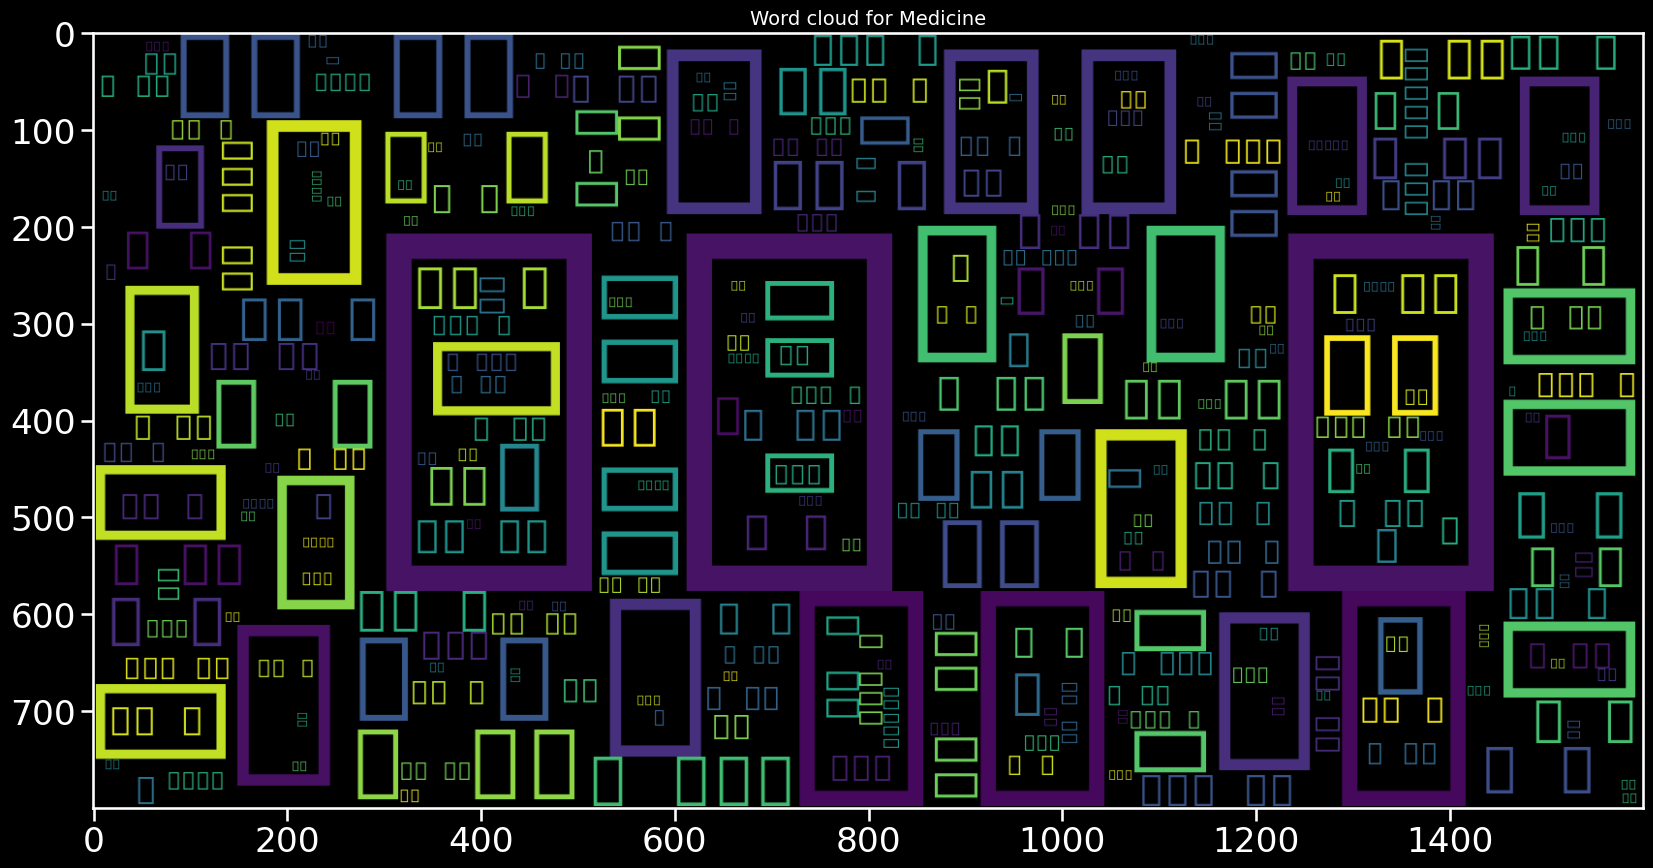

In [38]:
from wordcloud import WordCloud


plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(' '.join(df_med.cleaned_problem))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word cloud for Medicine', fontsize = 14)

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

In [56]:
def label_encoding(specialist,bool):
    """
    This function will return the encoded labels in array format.

    Args:
        specialist: series of class names(str)
        bool: boolean (True or False)

    Returns:
        labels: numpy array
    """
    le = LabelEncoder()
    le.fit(specialist)
    encoded_labels = le.transform(specialist)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->", le.classes_)
        # print("\n\t\t\t===== Labels =====",labels)
        # for i in sample_data:
        #     print(specialist[i],' ', encoded_labels[i],'\n')

    return labels, le

In [65]:
def dataset_split(feature_space,specialist):
    """
    This function will return the splitted (80%-20%) feature vector .

    Args:
        feature_space: calcuated feature vector (sparse matrix)
        specialist: encoded lables (array)

    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,specialist,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test

In [58]:
new_df.cleaned_problem = new_df.cleaned_problem.apply(lambda x:x.replace('\n',' '))

### Model Building Using Machine Learning Feature Extraction Using TF-IDF

In [59]:
# Unigram Tf-idf value calculation

def calc_gram_tfidf(problems, gram):

  """
  This function will return the tf-idf value of the respective gram features .

  Args:
      problems: a list of cleaned problems

  Returns:
      tfidf: a instance of TfidfVectorizer
      X : Unigram Feature Vector (sparse matrix)
  """
  tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split())
  X = tfidf.fit_transform(problems)

  return tfidf, X



In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [61]:
#########  Classifiers Defination  #########
def ml_models_defination():
    """
    This function consists the models defination for All gram Features

    Retuns:
        ml_models: list of models
        model_names: list of model_names

    """


    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    sgd_model = SGDClassifier(loss='log', random_state=0)
    lgb_model = lgb.LGBMClassifier(random_state=0)

    model_names = ['Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM', 'SGD Classifier', 'LightGBM']

    # Create list of models
    ml_models = [dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model, sgd_model, lgb_model]
    #ml_models = [lr_model]
    return ml_models, model_names

In [70]:
####### Model Evaluation Function ############

def model_performace(model,X_train,X_test,y_train,y_test, label_encoder, vectorizer):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.

    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)

    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y, average='micro'),4)*100 # try for ---> average='macro'
    my_dict['Recall'] = round(recall_score(y_test, pred_y, average='micro'),4)*100 # try for ---> average='macro'
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, average='micro'),4)*100 # try for ---> average='macro'

    # Display sample predictions
    sample_indices = [0, 1, 2, 3, 4]  # indices of samples to display
    print("\nSample predictions:")
    for idx in sample_indices:
        actual_class_name = label_encoder.inverse_transform([y_test[idx]])[0]
        predicted_class_name = label_encoder.inverse_transform([pred_y[idx]])[0]
        input_text_vector = X_test[idx]
        input_text_tokens = vectorizer.inverse_transform(input_text_vector)[0]  # Convert vectorized text back to tokens
        input_text = ' '.join(input_text_tokens)  # Join tokens to form the original text
        print(f"Sample {idx}: Problem = {input_text}  \nPredicted={predicted_class_name}, Actual={actual_class_name}")

    return my_dict

In [63]:
#### Model Performane into Dataframe #####
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.

    Args:
        performance_dict: a dictionary of all the parameters for each models

    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['DT','RF','MNB','KNN','Linear SVM','RBF SVM', 'SGD', 'LightGBM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

### Model Training

In [71]:
## performance of the model for each gram feature
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
acc = {}
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(new_df.cleaned_problem,gram)
    labels, label_encoder = label_encoding(new_df.Specialist, False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels)
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test, label_encoder, tfidf) for j,model in enumerate(ml_models)}
    acc = accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 814

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 658 
	Training		 526 
	Test			 132

Sample predictions:
Sample 0: Problem = দেয় খুব হঠাৎ শুরু করে চোখ ব্যথা আমার  
Predicted=Ophthalmologist, Actual=Ophthalmologist
Sample 1: Problem = যাই ভুলে তারাতারি খুব মনোযোগ কাজে দিতে ঘুম আমি পারি ঠিকমত না হয়  
Predicted=Medicine, Actual=Medicine
Sample 2: Problem = রক্ত সাথে সর্দির বন্ধ নাক পরে আর আমার  
Predicted=Medicine, Actual=ENT
Sample 3: Problem = চুল্কায় গোটা এগুলো উঠে মুখে আর অনেক আমার  
Predicted=Medicine, Actual=Skin
Sample 4: Problem = দুর্বল দাদুর অস্থির হার্টে খুব টেনশন পারে নিতে না হয়ে কোনো বেশি যায় অনেক আমার  
Predicted=Medicine, Actual=Cardiologist

Sample predictions:
Sample 0: Problem = দেয় খুব হঠাৎ শুরু করে চোখ ব্যথা আমার  
Predicted=Ophthalmologist, Actual=Ophthalmologist
Sample 1: Problem = যাই ভুলে তারাতারি খুব মনোযোগ কাজে দিতে ঘুম আমি পারি ঠিকমত না হয়  
Predicted=Medicine, Actual=Medicine
Sample 2: Problem = রক্ত সাথে সর্দির বন্ধ

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Sample predictions:
Sample 0: Problem = করে খুব চোখ হঠাৎ করে দেয় দেয় শুরু করে খুব ব্যথা খুব আমার চোখ হঠাৎ করে হঠাৎ ব্যথা শুরু শুরু করে চোখ ব্যথা আমার  
Predicted=Ophthalmologist, Actual=Ophthalmologist
Sample 1: Problem = ভুলে যাই তারাতারি ভুলে খুব তারাতারি না খুব না ঘুম দিতে পারি মনোযোগ দিতে ঠিকমত মনোযোগ কাজে ঠিকমত আমি কাজে যাই ভুলে তারাতারি খুব মনোযোগ কাজে দিতে ঠিকমত হয় ঘুম ঠিকমত ঘুম আমি পারি না পারি ঠিকমত হয় না না হয়  
Predicted=Medicine, Actual=Medicine
Sample 2: Problem = রক্ত পরে সাথে রক্ত সর্দির সাথে আর সর্দির বন্ধ আর নাক বন্ধ আমার নাক রক্ত সাথে সর্দির বন্ধ নাক পরে আর আমার  
Predicted=Medicine, Actual=ENT
Sample 3: Problem = এগুলো অনেক আর এগুলো অনেক গোটা অনেক চুল্কায় চুল্কায় গোটা উঠে গোটা উঠে আর মুখে অনেক আমার মুখে এগুলো উঠে মুখে আর অনেক আমার  
Predicted=Skin, Actual=Skin
Sample 4: Problem = টেনশন নিতে কোনো টেনশন বেশি কোনো দুর্বল বেশি খুব দুর্বল হার্টে খুব দুর্বল দাদুর হার্টে আমার দাদুর দাদুর অস্থির হয়ে অনেক অস্থির অস্থির নিতে পারে হার্টে খুব টেনশন হয়ে যায় পারে না পারে নিতে না 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Sample predictions:
Sample 0: Problem = ব্যথা শুরু করে খুব ব্যথা শুরু করে খুব ব্যথা হঠাৎ করে খুব চোখ হঠাৎ করে আমার চোখ হঠাৎ করে খুব চোখ হঠাৎ শুরু করে দেয় করে দেয় দেয় শুরু করে খুব ব্যথা খুব আমার চোখ হঠাৎ করে হঠাৎ ব্যথা শুরু শুরু করে চোখ ব্যথা আমার  
Predicted=Ophthalmologist, Actual=Ophthalmologist
Sample 1: Problem = তারাতারি ভুলে যাই খুব তারাতারি ভুলে না খুব তারাতারি হয় না খুব না ঘুম ঠিকমত পারি না ঘুম দিতে পারি না মনোযোগ দিতে পারি ঠিকমত মনোযোগ দিতে কাজে ঠিকমত মনোযোগ আমি কাজে ঠিকমত ভুলে যাই তারাতারি ভুলে খুব তারাতারি না খুব না ঘুম দিতে পারি মনোযোগ দিতে ঠিকমত মনোযোগ কাজে ঠিকমত আমি কাজে যাই ভুলে তারাতারি খুব মনোযোগ কাজে দিতে ঠিকমত হয় না ঘুম ঠিকমত হয় ঠিকমত হয় ঘুম ঠিকমত ঘুম আমি পারি না পারি ঠিকমত হয় না না হয়  
Predicted=Medicine, Actual=Medicine
Sample 2: Problem = সাথে রক্ত পরে সর্দির সাথে রক্ত আর সর্দির সাথে বন্ধ আর সর্দির নাক বন্ধ আর আমার নাক বন্ধ রক্ত পরে সাথে রক্ত সর্দির সাথে আর সর্দির বন্ধ আর নাক বন্ধ আমার নাক রক্ত সাথে সর্দির বন্ধ নাক পরে আর আমার  
Predicted=Medicine, Actual=ENT
Sa

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [49]:
acc

{'Decision Tree': {'Accuracy': 63.63999999999999,
  'Precision': 63.63999999999999,
  'Recall': 63.63999999999999,
  'F1 Score': 63.63999999999999},
 'Random Forest': {'Accuracy': 68.17999999999999,
  'Precision': 68.17999999999999,
  'Recall': 68.17999999999999,
  'F1 Score': 68.17999999999999},
 'Naive Bayes': {'Accuracy': 70.45,
  'Precision': 70.45,
  'Recall': 70.45,
  'F1 Score': 70.45},
 'KNN': {'Accuracy': 65.91,
  'Precision': 65.91,
  'Recall': 65.91,
  'F1 Score': 65.91},
 'Linear SVM': {'Accuracy': 44.7,
  'Precision': 44.7,
  'Recall': 44.7,
  'F1 Score': 44.7},
 'Kernel SVM': {'Accuracy': 44.7,
  'Precision': 44.7,
  'Recall': 44.7,
  'F1 Score': 44.7},
 'SGD Classifier': {'Accuracy': 73.48,
  'Precision': 73.48,
  'Recall': 73.48,
  'F1 Score': 73.48},
 'LightGBM': {'Accuracy': 64.39,
  'Precision': 64.39,
  'Recall': 64.39,
  'F1 Score': 64.39}}

### Performance Table

In [50]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  table = performance_table(acc)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")



========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     63.64      63.64   63.64     63.64          DT
1     68.18      68.18   68.18     68.18          RF
2     70.45      70.45   70.45     70.45         MNB
3     65.91      65.91   65.91     65.91         KNN
4     44.70      44.70   44.70     44.70  Linear SVM
5     44.70      44.70   44.70     44.70     RBF SVM
6     73.48      73.48   73.48     73.48         SGD
7     64.39      64.39   64.39     64.39    LightGBM

========In case of Unigram feature:========

Highest Accuracy achieved by SGD at = 73.48
Highest F1-Score achieved by SGD at = 73.48
Highest Precision Score achieved by SGD at = 73.48
Highest Recall Score achieved by SGD at = 73.48

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     63.64      63.64   63.64     63.64          DT
1     68.18      68.18   68.18     68.18          RF
2     70.45   